In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np 

In [ ]:
imbook = cv2.imread('./book.png')
imbook = cv2.cvtColor(imbook, cv2.COLOR_BGR2GRAY)

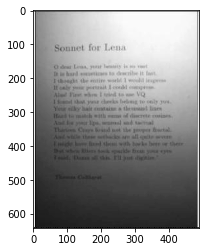

In [ ]:
plt.imshow(imbook,cmap = "gray")

In [ ]:
def convolution(oldimage, kernel):
    image_h = oldimage.shape[0]
    image_w = oldimage.shape[1]
    kernel_h = kernel.shape[0]
    kernel_w = kernel.shape[1]
    
    if(len(oldimage.shape) == 3):
        image_pad = np.pad(oldimage, pad_width=(
            \(kernel_h // 2, kernel_h // 2),(kernel_w // 2, 
            \kernel_w // 2),(0,0)), mode='constant', 
            \constant_values=0).astype(np.float32)
    elif(len(oldimage.shape) == 2):
        image_pad = np.pad(oldimage, pad_width=(
            \(kernel_h // 2, kernel_h // 2),(kernel_w // 2, 
            \kernel_w // 2)), mode='constant', constant_values=0)
            \.astype(np.float32)
    
    
    h = kernel_h // 2
    w = kernel_w // 2
    
    image_conv = np.zeros(image_pad.shape)
    
    for i in range(h, image_pad.shape[0]-h):
        for j in range(w, image_pad.shape[1]-w):
            #sum = 0
            x = image_pad[i-h:i-h+kernel_h, j-w:j-w+kernel_w]
            x = x.flatten()*kernel.flatten()
            image_conv[i][j] = x.sum()
    h_end = -h
    w_end = -w
    
    if(h == 0):
        return image_conv[h:,w:w_end]
    if(w == 0):
        return image_conv[h:h_end,w:]
return image_conv[h:h_end,w:w_end]


In [ ]:
2. Defining the Gaussian function based on the size of sigma(standard deviation).
def my_gauassian_filter(image, sigma):
    image = Image.open(image)
    image = np.asarray(image)
    filter_size = 2 * int(4 * sigma + 0.5) + 1
    gaussian_filter = np.zeros((filter_size, filter_size), np.float32)
    m = filter_size//2
    n = filter_size//2
    
    for x in range(-m, m+1):
        for y in range(-n, n+1):
            x1 = 2*np.pi*(sigma**2)
            x2 = np.exp(-(x**2 + y**2)/(2* sigma**2))
            gaussian_filter[x+m, y+n] = (1/x1)*x2
    
    im_filtered = np.zeros_like(image, dtype=np.float32)
    for c in range(3):
        im_filtered[:, :, c] = convolution(image[:, :, c], gaussian_filter)
    return (im_filtered.astype(np.uint8))
